In [3]:
#import libraries
from census import Census
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from configs import census_api
from us_state_abbrev import states
from scipy import stats

In [4]:
#request 2017 census data
url_2017 = "https://api.census.gov/data/2017/pep/population?get=POP,GEONAME&for=state:*&DATE=9"
request_2017 = requests.get(url_2017).json()

#create dataframe
request_2017_df = pd.DataFrame(request_2017,columns=request_2017[0])

#obtain desired data
pop_2017 = request_2017_df[['POP','GEONAME']]
pop_2017 = pop_2017.rename(columns = {"POP":"2017 Population",
                                     "GEONAME":"State"})
pop_2017.head()



,2017 Population,State
0,POP,GEONAME
1,4860545,Alabama
2,741522,Alaska
3,6908642,Arizona
4,2988231,Arkansas


In [9]:
#catch looped data
dfholder = []

#desired years
years = [2013,2014,2015,2016]

#run loop to obtain all desired data
for year in years:
    census_data = Census(census_api, year = year)
    census_data_years = census_data.acs5.get(('NAME', 'B01003_001E'),
                                             {'for': 'state:{}'.format(Census.ALL)})
    pop_census = pd.DataFrame(census_data_years)
    
    pop_census = pop_census.rename(columns = {"B01003_001E": f"{year} Population",
                                             "NAME":"State",
                                             "state":"State Number"})
    dfholder.append(pop_census)


In [10]:
#merge dataframes
merge_census = pop_2017.merge(dfholder[0]).merge(dfholder[1]).merge(dfholder[2]).merge(dfholder[3]).set_index(['State'])
census_df = merge_census[['State Number','2013 Population','2014 Population','2015 Population','2016 Population','2017 Population']].astype(float)

#save to csv
census_df.to_csv('data/census_df.csv')

#Find Percent change in population
census_df["Percent Change"] = (census_df['2017 Population']-census_df['2014 Population'])/census_df['2014 Population']*100
census_df_percent = census_df.style.format({'Percent Change': '{:.2f}%'})
census_df.head()

,State Number,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population,Percent Change
State,,,,,,,
Alabama,1.0,4799277.0,4817678.0,4830620.0,4841164.0,4860545.0,0.889785
Alaska,2.0,720316.0,728300.0,733375.0,736855.0,741522.0,1.815461
Arizona,4.0,6479703.0,6561516.0,6641928.0,6728577.0,6908642.0,5.290332
Arkansas,5.0,2933369.0,2947036.0,2958208.0,2968472.0,2988231.0,1.397845
California,6.0,37659181.0,38066920.0,38421464.0,38654206.0,39296476.0,3.229986


In [11]:
#reformat dataframe to use with other dataframes
pop_scaled = census_df[["2013 Population","2014 Population", "2016 Population","2017 Population"]]/100000
pop_change =pd.DataFrame((census_df['2017 Population']-census_df['2014 Population'])/census_df['2014 Population'])*100
pop_change = pop_change.rename( columns = {0:'Percent Change'},index = {
        'Alaska':'AK',
        'Alabama':'AL',
        'Arkansas':'AR',
        'American Samoa':'AS',
        'Arizona':'AZ',
        'California':'CA',
        'Colorado':'CO',
        'Connecticut':'CT',
        'District of Columbia':'DC',
        'Delaware':'DE',
        'Florida':'FL',
        'Georgia':'GA',
        'Guam':'GU',
        'Hawaii':'HI',
        'Iowa':'IA',
        'Idaho':'ID',
        'Illinois': 'IL',
        'Indiana':'IN',
        'Kansas':'KS',
        'Kentucky':'KY',
        'Louisiana':'LA',
        'Massachusetts':'MA',
        'Maryland':'MD',
        'Maine':'ME',
        'Michigan':'MI',
        'Minnesota':'MN',
        'Missouri':'MO',
        'Northern Mariana Islands':'MP',
        'Mississippi':'MS', 
        'Montana':'MT',
        'National': 'NA',
        'North Carolina':'NC',
        'North Dakota':'ND',
        'Nebraska':'NE',
        'New Hampshire':'NH',
        'New Jersey':'NJ',
        'New Mexico':'NM',
        'Nevada':'NV',
        'New York':'NY',
        'Ohio':'OH',
        'Oklahoma':'OK',
        'Oregon':'OR',
        'Pennsylvania':'PA',
        'Puerto Rico':'PR',
        'Rhode Island':'RI',
        'South Carolina':'SC',
        'South Dakota':'SD',
        'Tennessee':'TN',
        'Texas':'TX',
        'Utah':'UT',
        'Virginia':'VA',
        'Virgin Islands':'VI',
        'Vermont':'VT',
        'Washington':'WA',
        'Wisconsin':'WI',
        'West Virginia':'WV',
        'Wyoming':'WY'
})
pop_change = pop_change.reset_index()
#op_change = pop_change.drop(pop_change.iloc[-1])
pop_change.drop(pop_change.index[-1], inplace=True)
pop_change.to_csv('data/population_change.csv')
pop_change.style.format({"Percent Change" : "{:.2f}%"})
pop_change.head()

,State,Percent Change
0,AL,0.889785
1,AK,1.815461
2,AZ,5.290332
3,AR,1.397845
4,CA,3.229986


In [12]:
crime_resultdf = pd.read_csv('data/Crime_Results.csv')
crime_resultdf

,index,state,2014,2015,2016,2017,avg,delta,Abs,text
0,SD,South Dakota,72.0,103.0,144.0,199.0,129.50,176.388889,176.388889,176.39%
1,AK,Alaska,146.0,380.0,445.0,317.0,322.00,117.123288,117.123288,117.12%
2,MA,Massachusetts,968.0,1338.0,1544.0,1761.0,1402.75,81.921488,81.921488,81.92%
3,MN,Minnesota,450.0,410.0,468.0,759.0,521.75,68.666667,68.666667,68.67%
4,IL,Illinois,3095.0,3456.0,5055.0,5089.0,4173.75,64.426494,64.426494,64.43%
5,VT,Vermont,170.0,117.0,94.0,71.0,113.00,-58.235294,58.235294,-58.24%
6,KS,Kansas,381.0,461.0,572.0,578.0,498.00,51.706037,51.706037,51.71%
7,CO,Colorado,556.0,788.0,812.0,809.0,741.25,45.503597,45.503597,45.50%
8,AR,Arkansas,572.0,538.0,720.0,820.0,662.50,43.356643,43.356643,43.36%
9,WY,Wyoming,64.0,198.0,127.0,91.0,120.00,42.187500,42.187500,42.19%


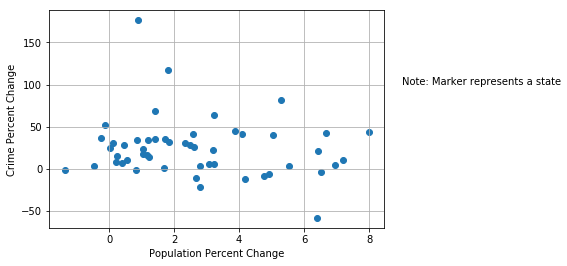

LinregressResult(slope=-2.2884905768727855, intercept=30.811322683185793, rvalue=-0.15210736480610973, pvalue=0.28662736864922256, stderr=2.1243093174712349)

In [13]:
#create scatter pot to show relation between population change and crime change
plt.scatter(pop_change['Percent Change'], crime_resultdf['delta'])
plt.xlabel('Population Percent Change')
plt.ylabel('Crime Percent Change')
#plt.legend(['State'])
plt.text(9,100,'Note: Marker represents a state')
plt.grid()
#plt.show()
#Observation Population increase does not correlate with increased crime.
plt.savefig("images/crime_pop_scatterplot.png")
plt.show()
test = stats.linregress(pop_change['Percent Change'], crime_resultdf['delta'])
test

In [14]:
census_df_abb = census_df.rename(index = {
        'Alaska':'AK',
        'Alabama':'AL',
        'Arkansas':'AR',
        'American Samoa':'AS',
        'Arizona':'AZ',
        'California':'CA',
        'Colorado':'CO',
        'Connecticut':'CT',
        'District of Columbia':'DC',
        'Delaware':'DE',
        'Florida':'FL',
        'Georgia':'GA',
        'Guam':'GU',
        'Hawaii':'HI',
        'Iowa':'IA',
        'Idaho':'ID',
        'Illinois': 'IL',
        'Indiana':'IN',
        'Kansas':'KS',
        'Kentucky':'KY',
        'Louisiana':'LA',
        'Massachusetts':'MA',
        'Maryland':'MD',
        'Maine':'ME',
        'Michigan':'MI',
        'Minnesota':'MN',
        'Missouri':'MO',
        'Northern Mariana Islands':'MP',
        'Mississippi':'MS', 
        'Montana':'MT',
        'National': 'NA',
        'North Carolina':'NC',
        'North Dakota':'ND',
        'Nebraska':'NE',
        'New Hampshire':'NH',
        'New Jersey':'NJ',
        'New Mexico':'NM',
        'Nevada':'NV',
        'New York':'NY',
        'Ohio':'OH',
        'Oklahoma':'OK',
        'Oregon':'OR',
        'Pennsylvania':'PA',
        'Puerto Rico':'PR',
        'Rhode Island':'RI',
        'South Carolina':'SC',
        'South Dakota':'SD',
        'Tennessee':'TN',
        'Texas':'TX',
        'Utah':'UT',
        'Virginia':'VA',
        'Virgin Islands':'VI',
        'Vermont':'VT',
        'Washington':'WA',
        'Wisconsin':'WI',
        'West Virginia':'WV',
        'Wyoming':'WY'
}).reset_index().sort_values(by=['State'])
crime_sort = crime_resultdf.rename(columns = {'index':'State'}).sort_values(by=['State'])
census_df_abb
crime_sort
census_crime_df = pd.merge(census_df_abb,crime_sort)
census_crime_df
crime_rate = pd.DataFrame(census_crime_df["2017"]/census_crime_df['2017 Population']*100000)
crime_rate['State'] = census_crime_df['State']
crime_rate = crime_rate.set_index('State')
crime_rate.to_csv('data/crime_rate.csv')
crime_rate.head()


,0
State,
AK,42.749912
AL,30.058358
AR,27.440984
AZ,8.496605
CA,11.675347


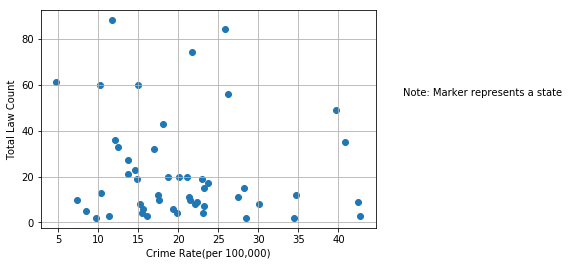

LinregressResult(slope=-0.049544027038658033, intercept=21.662522985708264, rvalue=-0.12226840891523935, pvalue=0.39761910981363391, stderr=0.058047785791172847)

In [15]:
total_law = pd.read_csv('data/StateGunLawCountByYear.csv')
total_law_df = pd.DataFrame(total_law)
total_law_df = total_law_df.set_index('state')
total_law_df = total_law_df.rename(index = {
        'Alaska':'AK',
        'Alabama':'AL',
        'Arkansas':'AR',
        'American Samoa':'AS',
        'Arizona':'AZ',
        'California':'CA',
        'Colorado':'CO',
        'Connecticut':'CT',
        'District of Columbia':'DC',
        'Delaware':'DE',
        'Florida':'FL',
        'Georgia':'GA',
        'Guam':'GU',
        'Hawaii':'HI',
        'Iowa':'IA',
        'Idaho':'ID',
        'Illinois': 'IL',
        'Indiana':'IN',
        'Kansas':'KS',
        'Kentucky':'KY',
        'Louisiana':'LA',
        'Massachusetts':'MA',
        'Maryland':'MD',
        'Maine':'ME',
        'Michigan':'MI',
        'Minnesota':'MN',
        'Missouri':'MO',
        'Northern Mariana Islands':'MP',
        'Mississippi':'MS', 
        'Montana':'MT',
        'National': 'NA',
        'North Carolina':'NC',
        'North Dakota':'ND',
        'Nebraska':'NE',
        'New Hampshire':'NH',
        'New Jersey':'NJ',
        'New Mexico':'NM',
        'Nevada':'NV',
        'New York':'NY',
        'Ohio':'OH',
        'Oklahoma':'OK',
        'Oregon':'OR',
        'Pennsylvania':'PA',
        'Puerto Rico':'PR',
        'Rhode Island':'RI',
        'South Carolina':'SC',
        'South Dakota':'SD',
        'Tennessee':'TN',
        'Texas':'TX',
        'Utah':'UT',
        'Virginia':'VA',
        'Virgin Islands':'VI',
        'Vermont':'VT',
        'Washington':'WA',
        'Wisconsin':'WI',
        'West Virginia':'WV',
        'Wyoming':'WY',})
total_law_df = total_law_df.sort_index()
crime_rate_vslaw = pd.DataFrame.join(total_law_df,crime_rate)
crime_rate_vslaw = crime_rate_vslaw.rename(columns = {0:"Crime Rate per 100,000"})
crime_rate_vslaw
plt.ylabel('Total Law Count')
plt.xlabel('Crime Rate(per 100,000)')
plt.text(48,55,'Note: Marker represents a state')
plt.scatter(crime_rate_vslaw['Crime Rate per 100,000'],crime_rate_vslaw['2017'])
plt.grid()
plt.savefig('images/crime_ratevslawgrid.png')

plt.show()
linear_regression = stats.linregress(crime_rate_vslaw['2017'],crime_rate_vslaw['Crime Rate per 100,000'])
linear_regression